In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#We are Importing basic libraries such as numpy.To use OpenCV we import cv2 library.We also import KMeans algorithm which is part of sklearn's cluster package.
import numpy as np
import cv2
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

The type of this input is <class 'numpy.ndarray'>
Shape: (1129, 1504, 3)


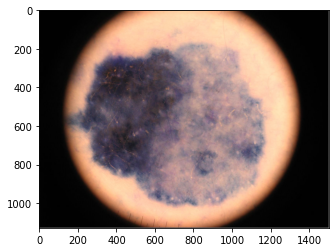

In [ ]:
#To read image we use the method cv2.imread() and plot the image using imshow()
img=cv2.imread('/content/drive/MyDrive/Melanoma/ISIC_0000036.jpg')
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape))
plt.imshow(img)

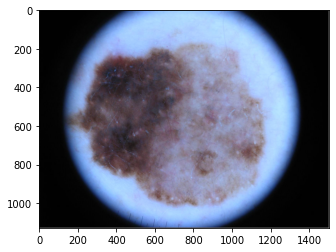

In [ ]:
#By default, OpenCV reads the image in Blue-Green-Red(BGR) Sequence. We convert it to RGB to get the original image.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

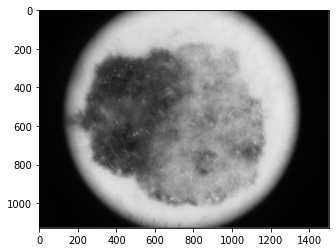

In [ ]:
#Coverting RGB image to Grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

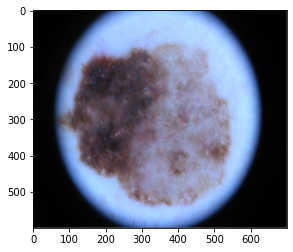

In [ ]:
#Resizing the image
resized_img = cv2.resize(img, (700, 600))
plt.imshow(resized_img)

In [ ]:
#RGB to HEX Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
#Getting the colors ofthe image and displaying it in a pie-chart
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
#KMeans algorithm creates clusters based on the supplied count of clusters.In our case, it will form clusters of colors and these clusters will be our top colors. 
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([204.07666586, 211.21602833, 234.75431727]),
 array([140.36170558,  77.21463164,  49.39041151]),
 array([171.15320045, 132.05166099, 110.33764382]),
 array([11.17554523, 11.98665237, 14.62537242]),
 array([158.57261546, 101.45435233,  73.61820224]),
 array([167.46975407, 166.86355336, 185.41112708]),
 array([ 86.24323013,  96.73852276, 126.09667087])]

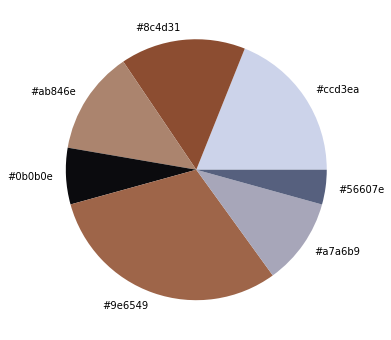

In [ ]:
#Pie-Chart will display top 5 colors of the image
get_colors(get_image('/content/drive/MyDrive/Melanoma/ISIC_0000075.jpg'), 7, True)